In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print("device: ", device)

device:  mps


In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100.0%


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100.0%


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100.0%

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



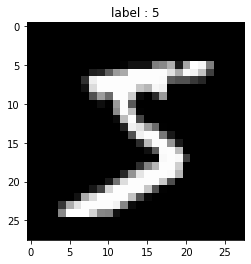

In [16]:
image, label = mnist_train[0]
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [17]:
linear1 = nn.Linear(28*28, 32, bias=True)
linear2 = nn.Linear(32, 32, bias=True)
linear3 = nn.Linear(32, 32, bias=True)

relu = nn.ReLU()
bn1 = nn.BatchNorm1d(32)
bn2 = nn.BatchNorm1d(32)

bn_model = nn.Sequential(linear1, bn1, relu, linear2, bn2, relu, linear3).to(device)

In [18]:
learning_rate = 0.01
training_epochs = 100
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [19]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(training_epochs):
    bn_model.train()
    
    for X, Y in train_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        predict = bn_model(X)
        loss = criterion(predict, Y)
        loss.backward()
        optimizer.step()
        
        
    if epoch % 10 == 0:
        print('Train loss at {} is {}'.format(epoch, loss.item()))
        

Train loss at 0 is 0.04135175049304962
